Data Science Research Methods
Babalola Ademola Tolulope 

Assignment 1
Contents

1.Data Cleaning

2.Data Correlation

3.Exploratory Data Analysis

4.Hypothesis Testing

5.Decisions

# INTRODUCTION

For SussexBudgetProductions, this study acts as a thorough analysis and strategic roadmap, intended to help with important choices concerning the upcoming movie's production. The main goal is to guarantee a profitable return on investment, especially in light of the financial loss from the previous film. Based on the given movie metadata dataset, the analysis will uses exploratory data analysis (EDA) to find trends, correlation and insights. Through an examination of the connections among budget, genre, directorial influence, and gross etc. This research seeks to offer practical suggestions to improve the forthcoming movie's commercial performance. With the ultimate objective of directing the production plan and gaining investor trust, the analyses are intended to evaluate theories on budget distribution, genre choice, and directorial influence etc.

# GOAL: 
The purpose of this project is to use data analytics and real-world facts to determine how Sussex Budget Productions, a production business, will use £500000 to make a profitable movie.

In [167]:
# Intialisation of all library uses required 
import math
import operator
import functools
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.stats import pearsonr
from scipy import stats
# Loading the dataset using pandas 
df = pd.read_csv("movie_metadata.csv")

In [168]:
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [169]:
df.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [170]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
num_critic_for_reviews,4993.0,1.401943e+02,1.216017e+02,1.00,50.00,110.00,195.00,8.130000e+02
duration,5028.0,1.072011e+02,2.519744e+01,7.00,93.00,103.00,118.00,5.110000e+02
director_facebook_likes,4939.0,6.865092e+02,2.813329e+03,0.00,7.00,49.00,194.50,2.300000e+04
actor_3_facebook_likes,5020.0,6.450098e+02,1.665042e+03,0.00,133.00,371.50,636.00,2.300000e+04
actor_1_facebook_likes,5036.0,6.560047e+03,1.502076e+04,0.00,614.00,988.00,11000.00,6.400000e+05
gross,4159.0,4.846841e+07,6.845299e+07,162.00,5340987.50,25517500.00,62309437.50,7.605058e+08
num_voted_users,5043.0,8.366816e+04,1.384853e+05,5.00,8593.50,34359.00,96309.00,1.689764e+06
cast_total_facebook_likes,5043.0,9.699064e+03,1.816380e+04,0.00,1411.00,3090.00,13756.50,6.567300e+05
facenumber_in_poster,5030.0,1.371173e+00,2.013576e+00,0.00,0.00,1.00,2.00,4.300000e+01
num_user_for_reviews,5022.0,2.727708e+02,3.779829e+02,1.00,65.00,156.00,326.00,5.060000e+03


# Data Exploration and Data Cleaning 

Data cleansing is the process of carefully reviewing the data that will be used and looking for patterns right away. First and foremost, the initial analysis reveals that the dataset has 5043 entries.

In [171]:
# Checking for missing value 
df.isnull().sum().sort_values(ascending=False)

gross                        884
budget                       492
aspect_ratio                 329
content_rating               303
plot_keywords                153
title_year                   108
director_name                104
director_facebook_likes      104
num_critic_for_reviews        50
actor_3_name                  23
actor_3_facebook_likes        23
num_user_for_reviews          21
color                         19
duration                      15
facenumber_in_poster          13
actor_2_name                  13
actor_2_facebook_likes        13
language                      12
actor_1_name                   7
actor_1_facebook_likes         7
country                        5
cast_total_facebook_likes      0
num_voted_users                0
movie_title                    0
movie_imdb_link                0
genres                         0
imdb_score                     0
movie_facebook_likes           0
dtype: int64

# Missing values of significance

# 'gross'

As can be shown, out of all the rows and records, 'gross' has the most percentage of missing data, with 884 fields (or 17.5%) showing no value. In cases like these, a few procedures are employed, such as removing all the rows with null values in the column labelled "gross" or, as the data is numerical, filling in all the blank spots with the column's mean or median.

While utilising 'gross' in our visualisations, there would be significant ramifications and consequences if we were to use the median or mean for a column that is so crucial to our research.

# 'budget'
The similar issue occurs when we examine the "budget," which is likewise crucial to our research but has 492 missing fields—a significant number considering that it represents 9.75% of all rows and records.

# Decision taken
It is decided to eliminate all rows/records that lack the columns "gross" and/or "budget" because it is crucial to preserve significant numerical values.

In [172]:
df = df[pd.notnull(df['budget'])]
df = df[pd.notnull(df['gross'])]
df.isnull().sum().sort_values(ascending=False)


aspect_ratio                 75
content_rating               51
plot_keywords                31
actor_3_name                 10
actor_3_facebook_likes       10
facenumber_in_poster          6
actor_2_facebook_likes        5
actor_2_name                  5
actor_1_facebook_likes        3
language                      3
actor_1_name                  3
color                         2
duration                      1
num_critic_for_reviews        1
num_voted_users               0
cast_total_facebook_likes     0
director_name                 0
movie_title                   0
genres                        0
movie_imdb_link               0
num_user_for_reviews          0
gross                         0
country                       0
director_facebook_likes       0
budget                        0
title_year                    0
imdb_score                    0
movie_facebook_likes          0
dtype: int64

In [173]:
def impute_missing_values(df, column, strategy='mean', fill_value=None):
    if strategy == 'mean':
        fill_value = df[column].mean()
    elif strategy == 'constant' and fill_value is None:
        raise ValueError("If strategy is 'constant', fill_value must be provided.")
    
    df[column].fillna(fill_value, inplace=True)

# Impute missing values for numerical columns
numerical_columns = ['actor_3_facebook_likes', 'facenumber_in_poster',
                     'actor_2_facebook_likes', 'actor_1_facebook_likes',
                     'num_critic_for_reviews', 'duration']

for column in numerical_columns:
    impute_missing_values(df, column)

# Impute missing values for categorical columns
categorical_columns = ['content_rating', 'plot_keywords', 'actor_3_name',
                        'actor_2_name', 'actor_1_name', 'language', 'color']

for column in categorical_columns:
    impute_missing_values(df, column, strategy='constant', fill_value='Unknown')

# Handle special cases
impute_missing_values(df, 'aspect_ratio', strategy='mean')
impute_missing_values(df, 'color', strategy='constant', fill_value='Color')

# Check if there are any more missing values
missing_values_exist = df.isnull().values.any()
print(f"Missing values exist: {missing_values_exist}")


Missing values exist: False


In [174]:
df.isnull().sum()

color                        0
director_name                0
num_critic_for_reviews       0
duration                     0
director_facebook_likes      0
actor_3_facebook_likes       0
actor_2_name                 0
actor_1_facebook_likes       0
gross                        0
genres                       0
actor_1_name                 0
movie_title                  0
num_voted_users              0
cast_total_facebook_likes    0
actor_3_name                 0
facenumber_in_poster         0
plot_keywords                0
movie_imdb_link              0
num_user_for_reviews         0
language                     0
country                      0
content_rating               0
budget                       0
title_year                   0
actor_2_facebook_likes       0
imdb_score                   0
aspect_ratio                 0
movie_facebook_likes         0
dtype: int64

In [175]:
# Print detailed information about duplicated rows
print(df.duplicated().value_counts())


False    3857
True       34
dtype: int64


# Duplicates

We can move forward with identifying and eliminating duplicate items from our dataset now that there are no missing values, as failing to do so could lead to inaccurate inferences in our data analysis. The only movie titles that would be of interest to us are those that appear twice or more in the dataset; for this reason, we search for movie title duplication.

In [176]:
df = df.drop_duplicates(subset = ['movie_title','budget','gross'], keep = False)
df = df.dropna(subset = ['budget','gross'])

In [177]:
print(df.duplicated().value_counts())

False    3695
dtype: int64


# Complete the dataset with the required data.

Moreover, to be included in the computations, a column that determines the movie's earnings needs to be added.

The "budget" will be subtracted from the "gross" to create the "profit" column.


In [178]:
df["profit"] = df["gross"]- df["budget"]

In [179]:
df["profit"] = df["gross"] - df["budget"]
avg_profit_by_director = df.groupby("director_name")["profit"].mean().sort_values(ascending=False)
print(f"Top Average profit by Directors: {avg_profit_by_director[:5]}")

Top Average profit by Directors: director_name
Tim Miller          305024263.0
George Lucas        277328296.0
Richard Marquand    276625409.0
Kyle Balda          262029560.0
Colin Trevorrow     252717531.5
Name: profit, dtype: float64


Since we require all films with budgets under £500,000, we must locate those films and incorporate them into our hypothesis in order to obtain some plausible performance results.

In [180]:
movies_under_budget = df[df['budget'] <= 500000].sort_values(by = 'budget', ascending = True)
movies_under_budget 

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,profit
4799,Color,Jonathan Caouette,72.0,88.0,20.0,0.0,Jonathan Caouette,58.0,592014.0,Biography|Documentary,...,English,USA,Unrated,218.0,2003.0,20.0,7.2,1.370000,754,591796.0
5042,Color,Jon Gunn,43.0,90.0,16.0,16.0,Brian Herzlinger,86.0,85222.0,Documentary,...,English,USA,PG,1100.0,2004.0,23.0,6.6,1.850000,456,84122.0
5026,Color,Olivier Assayas,81.0,110.0,107.0,45.0,Béatrice Dalle,576.0,136007.0,Drama|Music|Romance,...,French,France,R,4500.0,2004.0,133.0,6.9,2.350000,171,131507.0
5035,Color,Robert Rodriguez,56.0,81.0,0.0,6.0,Peter Marquardt,121.0,2040920.0,Action|Crime|Drama|Romance|Thriller,...,Spanish,USA,R,7000.0,1992.0,20.0,6.9,1.370000,0,2033920.0
5034,Color,Neill Dela Llana,35.0,80.0,0.0,0.0,Edgar Tancangco,0.0,70071.0,Thriller,...,English,Philippines,Not Rated,7000.0,2005.0,0.0,6.3,2.109751,74,63071.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4744,Color,Steve Buscemi,81.0,91.0,12000.0,213.0,Seymour Cassel,778.0,154077.0,Comedy|Drama,...,English,USA,R,500000.0,2005.0,327.0,6.6,1.850000,238,-345923.0
4743,Color,Neema Barnette,11.0,91.0,21.0,469.0,LisaRaye McCoy,597.0,243347.0,Crime|Drama|Thriller,...,English,USA,R,500000.0,2002.0,485.0,5.3,1.850000,86,-256653.0
4742,Color,Eric Schaeffer,25.0,98.0,71.0,658.0,Bill Duke,22000.0,295468.0,Comedy|Romance,...,English,USA,R,500000.0,2001.0,1000.0,6.0,1.850000,139,-204532.0
4751,Color,Quentin Dupieux,230.0,82.0,248.0,196.0,Jack Plotnick,353.0,98017.0,Comedy|Fantasy|Horror,...,English,France,R,500000.0,2010.0,248.0,5.8,1.850000,46000,-401983.0


It is evident that there are only 131 films with a budget of £500000 or less, which makes it more challenging to draw firm conclusions about films with that kind of budget in the future.

# Correlation of Data
Identifying the variables that correlate with one another, we can better analyse and look for patterns in our exploratory data analysis by determining the correlation between the various columns in our dataset.

In [181]:
numeric_df=df.select_dtypes(include=["float64","int64"])
corelation_matrix=numeric_df.corr()
corelation_matrix

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,profit
num_critic_for_reviews,1.000000,0.229610,0.188121,0.240865,0.167413,0.456142,0.597268,0.234866,-0.028446,0.565012,0.100190,0.390497,0.254095,0.350269,0.171315,0.701491,0.034642
duration,0.229610,1.000000,0.185797,0.119400,0.085204,0.240396,0.338042,0.119624,0.037145,0.343070,0.063613,-0.139138,0.128435,0.363578,0.150257,0.219533,0.007626
director_facebook_likes,0.188121,0.185797,1.000000,0.121793,0.092685,0.138745,0.312670,0.121853,-0.045289,0.231583,0.017721,-0.048864,0.115758,0.196092,0.040848,0.170312,0.023080
actor_3_facebook_likes,0.240865,0.119400,0.121793,1.000000,0.245737,0.256360,0.251851,0.470100,0.106379,0.201190,0.034144,0.105336,0.532889,0.072313,0.052595,0.255967,0.041268
actor_1_facebook_likes,0.167413,0.085204,0.092685,0.245737,1.000000,0.139867,0.178261,0.948731,0.062311,0.127523,0.013953,0.087950,0.383198,0.092035,0.059882,0.124197,0.027113
gross,0.456142,0.240396,0.138745,0.256360,0.139867,1.000000,0.628810,0.216438,-0.028505,0.549970,0.091238,0.028584,0.225612,0.215183,0.066663,0.351122,0.202229
num_voted_users,0.597268,0.338042,0.312670,0.251851,0.178261,0.628810,1.000000,0.240946,-0.034331,0.789275,0.063786,0.011656,0.234718,0.475387,0.086622,0.523787,0.120856
cast_total_facebook_likes,0.234866,0.119624,0.121853,0.470100,0.948731,0.216438,0.240946,1.000000,0.084773,0.181447,0.024305,0.116227,0.628465,0.104679,0.073578,0.194008,0.039288
facenumber_in_poster,-0.028446,0.037145,-0.045289,0.106379,0.062311,-0.028505,-0.034331,0.084773,1.000000,-0.073892,-0.022011,0.065942,0.072313,-0.071312,0.017955,0.007318,0.013324
num_user_for_reviews,0.565012,0.343070,0.231583,0.201190,0.127523,0.549970,0.789275,0.181447,-0.073892,1.000000,0.066435,0.009553,0.188459,0.326797,0.090688,0.386877,0.095232


In [182]:
corelation_matrix.style.background_gradient(cmap="coolwarm")

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,profit
num_critic_for_reviews,1.000000,0.229610,0.188121,0.240865,0.167413,0.456142,0.597268,0.234866,-0.028446,0.565012,0.100190,0.390497,0.254095,0.350269,0.171315,0.701491,0.034642
duration,0.229610,1.000000,0.185797,0.119400,0.085204,0.240396,0.338042,0.119624,0.037145,0.343070,0.063613,-0.139138,0.128435,0.363578,0.150257,0.219533,0.007626
director_facebook_likes,0.188121,0.185797,1.000000,0.121793,0.092685,0.138745,0.312670,0.121853,-0.045289,0.231583,0.017721,-0.048864,0.115758,0.196092,0.040848,0.170312,0.023080
actor_3_facebook_likes,0.240865,0.119400,0.121793,1.000000,0.245737,0.256360,0.251851,0.470100,0.106379,0.201190,0.034144,0.105336,0.532889,0.072313,0.052595,0.255967,0.041268
actor_1_facebook_likes,0.167413,0.085204,0.092685,0.245737,1.000000,0.139867,0.178261,0.948731,0.062311,0.127523,0.013953,0.087950,0.383198,0.092035,0.059882,0.124197,0.027113
gross,0.456142,0.240396,0.138745,0.256360,0.139867,1.000000,0.628810,0.216438,-0.028505,0.549970,0.091238,0.028584,0.225612,0.215183,0.066663,0.351122,0.202229
num_voted_users,0.597268,0.338042,0.312670,0.251851,0.178261,0.628810,1.000000,0.240946,-0.034331,0.789275,0.063786,0.011656,0.234718,0.475387,0.086622,0.523787,0.120856
cast_total_facebook_likes,0.234866,0.119624,0.121853,0.470100,0.948731,0.216438,0.240946,1.000000,0.084773,0.181447,0.024305,0.116227,0.628465,0.104679,0.073578,0.194008,0.039288
facenumber_in_poster,-0.028446,0.037145,-0.045289,0.106379,0.062311,-0.028505,-0.034331,0.084773,1.000000,-0.073892,-0.022011,0.065942,0.072313,-0.071312,0.017955,0.007318,0.013324
num_user_for_reviews,0.565012,0.343070,0.231583,0.201190,0.127523,0.549970,0.789275,0.181447,-0.073892,1.000000,0.066435,0.009553,0.188459,0.326797,0.090688,0.386877,0.095232


# imdb_score and Profit 

In [183]:
spearman, p_value = stats.spearmanr(df["imdb_score"], df["profit"])
print(f'Spearman correlation coefficient between IMDB score and profit is {spearman:.03f}')
print(f'The p-value is {p_value:.03f}')

Spearman correlation coefficient between IMDB score and profit is 0.234
The p-value is 0.000


The positive correlation coefficient (0.033) indicates a positive linear relationship between IMDB score and profit.
The p-value (0.043) is less than the common significance level of 0.05, suggesting that the correlation is statistically significant

# imdb_score and director_name

In [184]:
spearman, p_value = stats.spearmanr(df["imdb_score"], df["director_name"])
print(f'Spearman correlation coefficient between IMDB score and director_name is {spearman:.03f}')
print(f'The p-value is {p_value:.03f}')

Spearman correlation coefficient between IMDB score and director_name is 0.013
The p-value is 0.412


The low correlation coefficient (0.013) suggests a very weak positive linear relationship between IMDB score and the label-encoded director names.
The p-value (0.416) is greater than the common significance level of 0.05, indicating that the correlation is not statistically significant.

# Profit and Director_name

In [185]:
spearman, p_value = stats.spearmanr(df["profit"], df["director_name"])
print(f'Spearman correlation coefficient between profit and director_name is {spearman:.03f}')
print(f'The p-value is {p_value:.03f}')

Spearman correlation coefficient between profit and director_name is -0.028
The p-value is 0.092


In this case, the value −0.028 suggests a very weak negative monotonic relationship between "profit" and "director_name.The p-value (0.092) is greater than the common significance level of 0.05, indicating that the observed correlation is not statistically significant at the conventional significance level.

# imdb_score and Director_name

In [186]:
spearman, p_value = stats.spearmanr(df["imdb_score"], df["director_name"])
print(f'Spearman correlation coefficient between imdb_score and director_name is {spearman:.03f}')
print(f'The p-value is {p_value:.03f}')

Spearman correlation coefficient between imdb_score and director_name is 0.013
The p-value is 0.412


This case, the low positive value0.013 suggests a very weak positive monotonic relationship between "imdb_score" and "director_name."The p-value (0.412) is greater than the common significance level of 0.05, indicating that the observed correlation is not statistically significant at the conventional significance level.

# Profit and actor_1_name

In [187]:
spearman, p_value = stats.spearmanr(df["profit"], df["actor_1_name"])
print(f'Spearman correlation coefficient between profit and actor_1_name is {spearman:.03f}')
print(f'The p-value is {p_value:.03f}')

Spearman correlation coefficient between profit and actor_1_name is -0.005
The p-value is 0.773


This case, the very close to zero value −0.005 suggests an extremely weak negative monotonic relationship between "imdb_score" and "actor_1_name."The p-value (0.773) is much greater than the common significance level of 0.05, indicating that the observed correlation is not statistically significant at the conventional significance level.

# imdb_score and actor_1_name

In [188]:
spearman, p_value = stats.spearmanr(df["imdb_score"], df["actor_1_name"])
print(f'Spearman correlation coefficient between imdb_score and actor_1_name is {spearman:.03f}')
print(f'The p-value is {p_value:.03f}')

Spearman correlation coefficient between imdb_score and actor_1_name is 0.034
The p-value is 0.037


This case, the positive value 0.034 suggests a very weak positive monotonic relationship between "imdb_score" and "actor_1_name."The p-value (0.037) is less than the common significance level of 0.05, indicating that the observed correlation is statistically significant. 

# imdb_score and genres

In [189]:
spearman, p_value = stats.spearmanr(df["imdb_score"], df["genres"])
print(f'Spearman correlation coefficient between imdb_score and genres is {spearman:.03f}')
print(f'The p-value is {p_value:.03f}')

Spearman correlation coefficient between imdb_score and genres is 0.074
The p-value is 0.000


The positive value 0.074 suggests a very weak positive monotonic relationship between "imdb_score" and "genres."The p-value (0.000) is less than the common significance level of 0.05, indicating that the observed correlation is statistically significant.

# Profit and genres

In [190]:
spearman, p_value = stats.spearmanr(df["profit"], df["genres"])
print(f'Spearman correlation coefficient between profit and genres is {spearman:.03f}')
print(f'The p-value is {p_value:.03f}')

Spearman correlation coefficient between profit and genres is 0.065
The p-value is 0.000


The positive value 0.065 suggests a very weak positive monotonic relationship between "profit" and "genres."The p-value (0.000) is less than the common significance level of 0.05, indicating that the observed correlation is statistically significant.

# Results of Correlations
As it can be seen from the correlation calculations carried out using numerical and categorial data, imdb_score is positively correlated with director_name and actor_1_name. Furthermore positive correlations also occur with imdb_score and profit.

Since the above examples produce posivite correlations, the columns associated will be used in our Exploratory Data Analysis.

# 3.Exploratory Data Analysis
# Genres

Given that not all performers or filmmakers work in every genre of film, it seems sense to begin our examination with the term "genres." Consequently, we must first identify the genres that yield the highest profits from the films that fall inside our budget, using the 'profit' column.


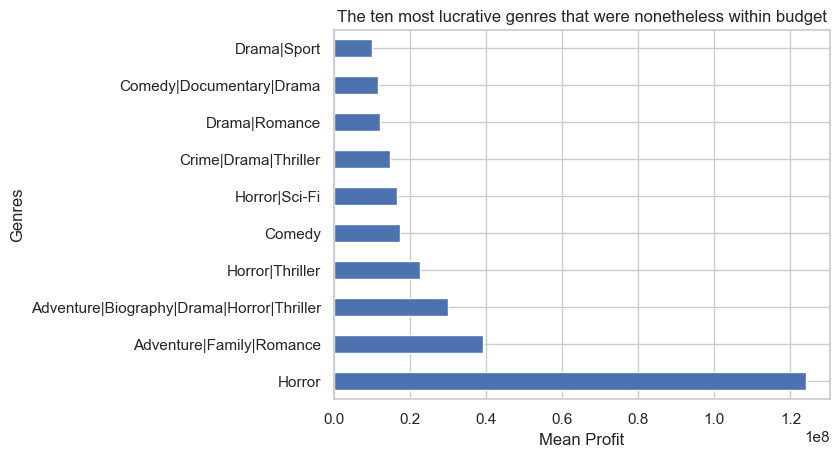

In [191]:

budget_profitable_movie = movies_under_budget[movies_under_budget['profit'] > 0]
profitableGenres = budget_profitable_movie.groupby('genres')['profit'].mean()
profitableGenres = profitableGenres.sort_values(ascending=False)
top10_genres = profitableGenres.head(10)

top10_genres.plot(kind='barh', title='The ten most lucrative genres that were nonetheless within budget')
plt.xlabel('Mean Profit')
plt.ylabel('Genres')
plt.show()


Given that the horror genre is the most lucrative, we should investigate the number of profitable horror films that fall inside our budget.

In [192]:
budget_profitable_movie = movies_under_budget[movies_under_budget['profit'] > 0]
horror_movie_within_budget =budget_profitable_movie[budget_profitable_movie['genres'].str.contains("Horror")]
horror_movie_within_budget


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,profit
5025,Color,John Waters,73.0,108.0,0.0,105.0,Mink Stole,462.0,180483.0,Comedy|Crime|Horror,...,English,USA,NC-17,10000.0,1972.0,143.0,6.1,1.37,0,170483.0
4793,Color,Oren Peli,409.0,84.0,110.0,21.0,Ashley Palmer,189.0,107917283.0,Horror,...,English,USA,R,15000.0,2007.0,109.0,6.3,1.85,12000,107902283.0
4962,Black and White,Larry Blamire,88.0,90.0,56.0,56.0,Brian Howe,126.0,110536.0,Comedy|Horror|Sci-Fi,...,English,USA,PG,40000.0,2001.0,76.0,7.0,1.85,0,70536.0
4707,Black and White,Daniel Myrick,360.0,81.0,19.0,39.0,Joshua Leonard,170.0,140530114.0,Horror,...,English,USA,R,60000.0,1999.0,170.0,6.4,1.33,0,140470114.0
4956,Color,Travis Cluff,159.0,81.0,3.0,7.0,Cassidy Gifford,220.0,22757819.0,Horror|Thriller,...,English,USA,R,100000.0,2015.0,40.0,4.2,1.85,0,22657819.0
4893,Black and White,Eugène Lourié,67.0,80.0,7.0,21.0,Cecil Kellaway,57.0,5000000.0,Adventure|Horror|Sci-Fi,...,English,USA,Approved,210000.0,1953.0,40.0,6.7,1.37,465,4790000.0
4726,Color,Chris Kentis,235.0,79.0,9.0,7.0,Saul Stein,48.0,30500882.0,Adventure|Biography|Drama|Horror|Thriller,...,English,USA,R,500000.0,2003.0,10.0,5.7,1.85,0,30000882.0
4728,Color,John 'Bud' Cardos,95.0,97.0,8.0,22.0,Hoke Howell,423.0,17000000.0,Horror|Sci-Fi,...,English,USA,PG,500000.0,1977.0,23.0,5.9,1.85,0,16500000.0


There are eight horror films that were made on budgets of £500,000 or less that turned a profit. It may be concluded that the horror genre is the best fit for our budget, despite the fact that this is a tiny number given our total of 5043 submissions.

# Director_name
We may choose a director who can make a horror film within our budget by applying the study of genres we did earlier.

In [193]:
horror_movie_within_budget.groupby('director_name')['profit'].count().sort_values(ascending = False).head(10)

director_name
Chris Kentis         1
Daniel Myrick        1
Eugène Lourié        1
John 'Bud' Cardos    1
John Waters          1
Larry Blamire        1
Oren Peli            1
Travis Cluff         1
Name: profit, dtype: int64

The filmmakers listed above have a track record of making profitable horror films that fit within our budget. Since each director has only one film, it is challenging to determine which one is the greatest fit without more research.

We must examine these directors' IMDb scores for their films in order to conduct more analysis.


<Axes: ylabel='director_name'>

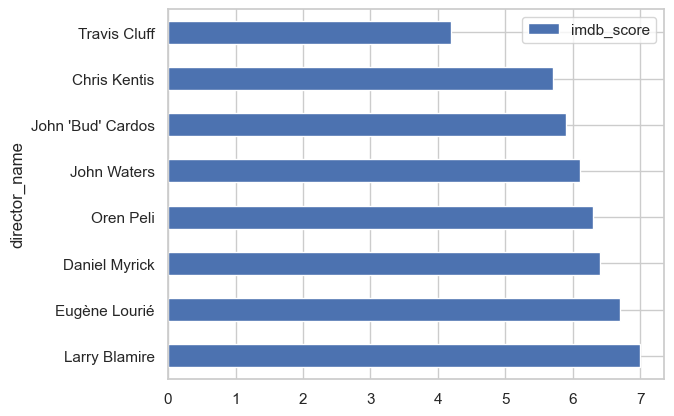

In [194]:
directorsHorror_movie_within_budget = horror_movie_within_budget.sort_values(by = 'imdb_score', ascending = False)
directorsHorror_movie_within_budget.plot(x = 'director_name',y = 'imdb_score', kind = 'barh') 

Better insights can be obtained by analysing our directors based on their Facebook likes.

<Axes: ylabel='director_name'>

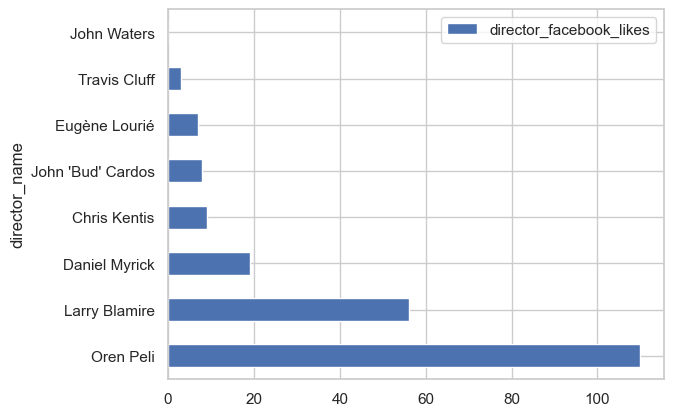

In [195]:
directorsHorror_budget =  horror_movie_within_budget.sort_values(by = 'director_facebook_likes', ascending = False)
directorsHorror_budget.plot(x = 'director_name', y = 'director_facebook_likes', kind = 'barh') 

The best directors for a horror movie as of IMDB scores and Facebook likes are Larry Blamire and Oren Peli with the second having way more interactions with fans as he is well percieved on Facebook.

'actor_1_name'
To get to know the best actors we have to look at their returns in profit as the movie to be produced has to be well profitable.

In [196]:
  horror_movie_within_budget.groupby('actor_1_name')['profit'].count().sort_values(ascending = False).head(10)

actor_1_name
Blanchard Ryan     1
Divine             1
Fay Masterson      1
Heather Donahue    1
Kenneth Tobey      1
Micah Sloat        1
Pfeifer Brown      1
Woody Strode       1
Name: profit, dtype: int64

The top actors who have performed in profitable horror films in the past and who fall inside our budget are listed above. Since they have all only one film apiece, it is challenging to determine which starring actor is the greatest fit without further investigation.

We must look at these actors' IMDb ratings for their films in order to conduct more analysis.


<Axes: ylabel='actor_1_name'>

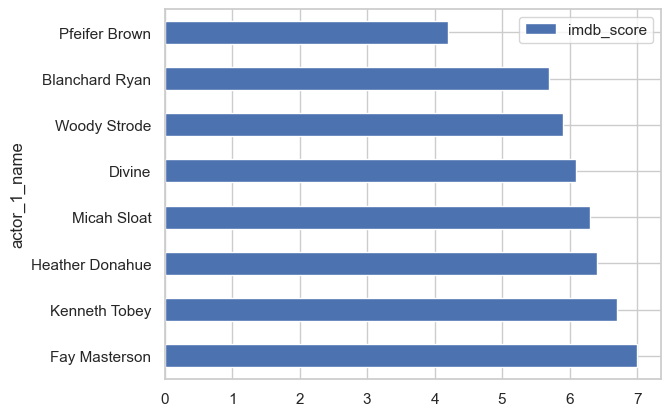

In [197]:
actorsHorror_budget =horror_movie_within_budget.sort_values(by = 'imdb_score', ascending = False)
actorsHorror_budget.plot(x ='actor_1_name', y ='imdb_score', kind ='barh') 

We need to also look at the Facebook likes of these actors as most of them get reasonably good IMDB scores on their movies.

<Axes: ylabel='actor_1_name'>

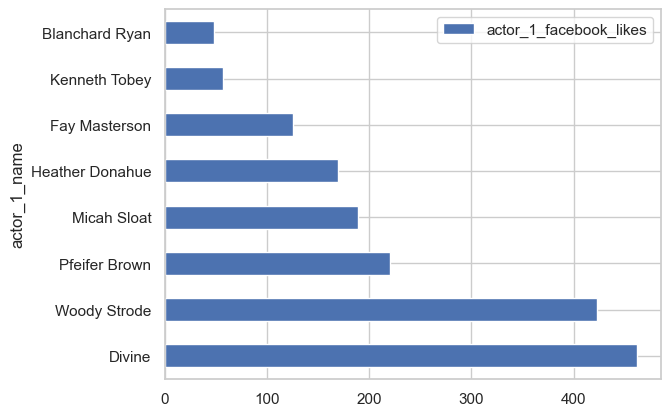

In [198]:
actorsHorror_budget = horror_movie_within_budget.sort_values(by = 'actor_1_facebook_likes', ascending = False)
actorsHorror_budget.plot(x = 'actor_1_name', y = 'actor_1_facebook_likes', kind ='barh') 

Although there isn't much of a correlation between Facebook likes and IMDB scores, it is still advisable to choose a candidate with both a high number of likes on Facebook and a strong IMDB score; Divine would have made a great main actor.

In [206]:
from scipy.stats import t,norm
# Mean of genre
genre_mean = df.groupby('genres')['profit'].mean() 
# count(n) of genre 
genre_count = df.groupby('genres')['profit'].count() 
# standard deviation of genre 
genre_standard_deviation = df.groupby('genres')['profit'].std() #std of genre

p = (genre_mean['Horror']) / (genre_standard_deviation['Horror'] / np.sqrt(genre_count['Horror']))
p_value = (1 - t.cdf(p,genre_count['Horror']))

if p_value > 0.1:
    print("The p_value is ", p_value, " and h1 is rejected. Horror genre is not a good investment.")
else:
    print("The p_value is ", p_value, " and h0 is rejected. Horror genre is a good investment.")

The p_value is  0.00010532443846289485  and h0 is rejected. Horror genre is a good investment.


# Decision
The CEO of SussexBudgetProductions stated that the primary objective is to make a new film with a £500000 budget that would guarantee a healthy return on investment.

The information indicates that there are insufficient entries for films with budgets of around or less than £500,000. Consequently, the data provided is insufficient to completely support the assertions we are to make, but even so, it is clear that the horror genre excels in terms of profit margins for films that fall within our budget. Horror has a strong chance of making a profit overall, as our hypothesis testing on horror films confirmed.

Based on their Facebook likes and IMDB ratings, Larry Blamire and Oren Peli are the two directors we have to pick from. Both of them made excellent horror films that fit our budgetary constraints.

Based on the IMDB score and Facebook likes for our star actor, Divine, we can tell that he is the finest actor for horror films that don't break the bank. Using Micah Sloat as our secondary actor would be a smart move, since he has a stellar IMDB score for his horror film and engages with fans on Facebook with a respectable number of likes.

